** Kaggle: Mall Customer Segmentation**

**Context**:
This dataset is created only for learning purposes of the customer segmentation concepts, also known as market basket analysis.

**Content**:
You are owning a supermarket mall and through membership cards, you have some basic data about your customers like customer ID, age, gender, annual income and spending score.

**Problem Statement**:
You own the mall and **want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to the marketing team and plan the strategy accordingly**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
data = pd.read_csv('./data/Mall_Customers.csv')
data.head()

## **Data Analysis**

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Gender,200.0,0.56,0.497633,0.0,0.00,1.0,1.00,1.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [15]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [16]:
data[data.duplicated()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [ ]:
data['Gender'] = data['Gender'].map({'Male':0, 'Female': 1})

## **Variable Distribution and Outlier Distribution**

CustomerID
Skew: 0.0


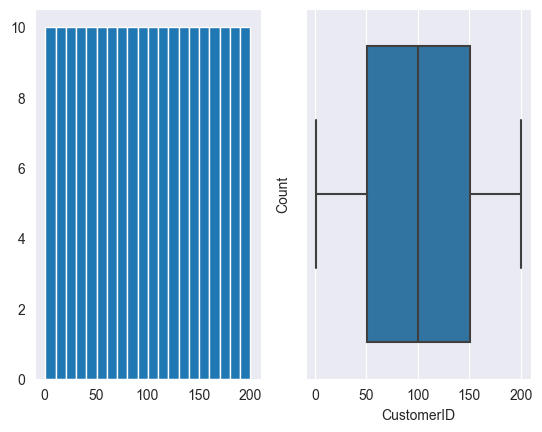

Gender
Skew: -0.24357754003130935


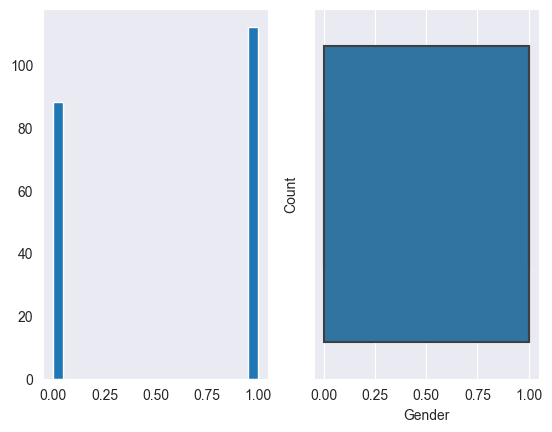

Age
Skew: 0.48556885096681657


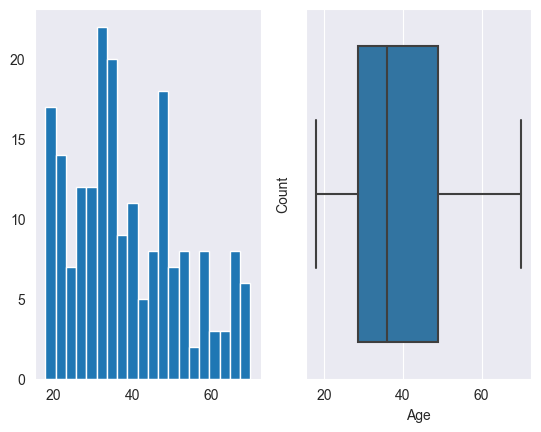

Annual Income (k$)
Skew: 0.3218425498619055


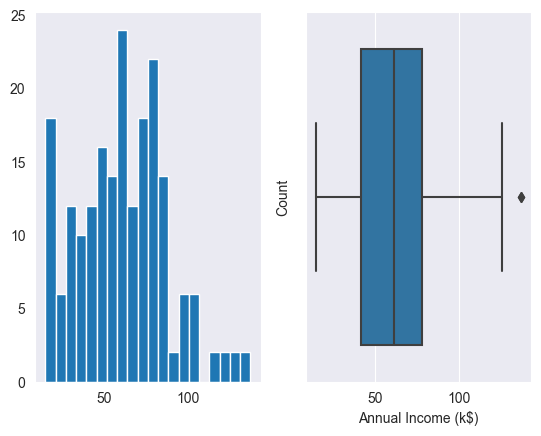

Spending Score (1-100)
Skew: -0.047220201374263374


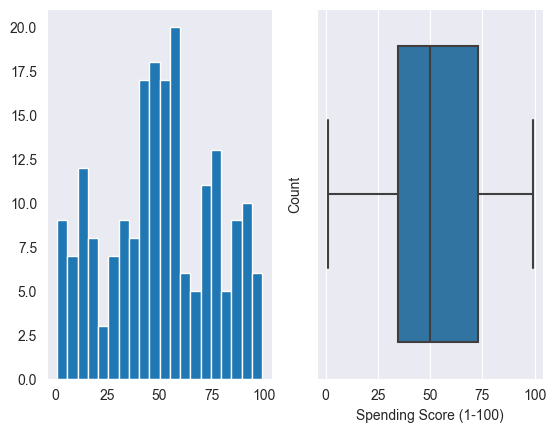

In [17]:
for col in data.columns:
    print(col)
    print('Skew:', data[col].skew())
    plt.subplot(1, 2, 1)
    data[col].hist(bins=20, grid=False)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.ylabel('Count')
    plt.show()

In [23]:
data = data.drop(['CustomerID'], axis=1)

## **Scaling the data**

In [24]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Labels
0,-1.128152,-1.424569,-1.738999,-0.434801,0.929759
1,-1.128152,-1.281035,-1.738999,1.195704,0.929759
2,0.886405,-1.352802,-1.700830,-1.715913,1.316353
3,0.886405,-1.137502,-1.700830,1.040418,-1.389806
4,0.886405,-0.563369,-1.662660,-0.395980,1.316353


C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

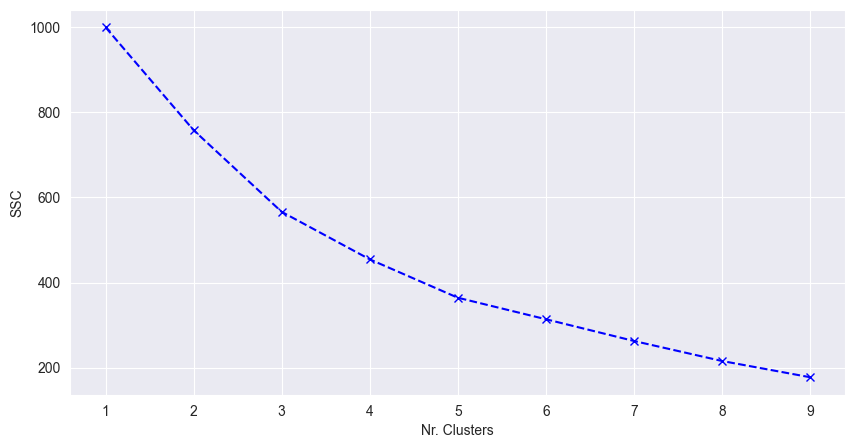

In [25]:
#K-Means

ssc = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    ssc[k] = kmeans.inertia_

#Elbow Plot
plt.figure(figsize=(10, 5))
plt.plot(list(ssc.keys()), list(ssc.values()), 'bx--')
plt.xlabel('Nr. Clusters')
plt.ylabel('SSC')
plt.show()

C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

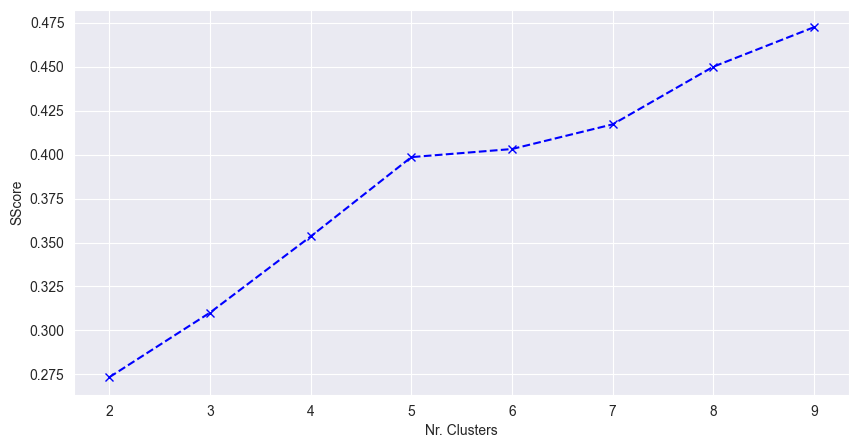

In [26]:
# Silhouette Score
sc = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    labels = kmeans.predict(data_scaled)
    sc[k] = silhouette_score(data_scaled, labels)

plt.figure(figsize=(10, 5))
plt.plot(list(sc.keys()), list(sc.values()), 'bx--')
plt.xlabel('Nr. Clusters')
plt.ylabel('SScore')
plt.show()


In [27]:
kmeans = KMeans(n_clusters=9, random_state=1).fit(data_scaled)
data['Labels'] = kmeans.predict(data_scaled)
data['Labels'].value_counts()

C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    31
8    29
5    26
6    23
3    21
4    20
2    18
1    18
7    14
Name: Labels, dtype: int64

In [28]:
mean = data.groupby('Labels').mean()
median = data.groupby('Labels').median()

df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['G0_Mean', 'G1_Mean', 'G2_Mean', 'G3_Mean', 'G4_Mean', 'G5_Mean', 'G6_Mean', 'G7_Mean', 'G8_Mean', 'G0_Median', 'G1_Median', 'G2_Median', 'G3_Median', 'G4_Median', 'G5_Median', 'G6_Median', 'G7_Median', 'G8_Median']
df_kmeans.T

,G0_Mean,G1_Mean,G2_Mean,G3_Mean,G4_Mean,G5_Mean,G6_Mean,G7_Mean,G8_Mean,G0_Median,G1_Median,G2_Median,G3_Median,G4_Median,G5_Median,G6_Median,G7_Median,G8_Median
Gender,1.000000,0.000000,1.000000,1.000000,0.00,0.000000,0.000000,0.928571,1.000000,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
Age,25.741935,33.277778,40.388889,32.190476,39.50,58.115385,24.608696,41.214286,52.620690,24.0,32.0,41.0,32.0,41.0,59.0,24.0,41.0,50.0
Annual Income (k$),41.612903,87.111111,88.388889,86.047619,85.15,48.038462,40.695652,26.071429,55.275862,40.0,82.5,82.5,79.0,79.5,51.5,42.0,26.5,54.0
Spending Score (1-100),62.645161,82.666667,24.000000,81.666667,14.05,41.269231,61.478261,20.142857,48.724138,57.0,85.5,23.5,83.0,12.5,46.0,59.0,16.0,49.0


**Cluster 0**: Young Adult Female Customers, with Medium Spending Score and Lower Annual Income
**Cluster 1**: Young Adult Male Customers, with Medium Spending and Medium Annual Income
**Cluster 2**: Adult Female Customers, with lower Spending Annual Income and Medium Spending
**Cluster 3**: Adult Female Customers, with higher spending annual income and medium spending
**Cluster 4**: Adult Male Customers, with higher spending annual income and medium spending
**Cluster 5**: Older Male Customers, with medium spending annual income and medium spending
**Cluster 6**: Young Adult Male Customers, with medium  spending annual income and higher spending
**Cluster 7**: Mixed Older Customers, with low medium spending annual income and lower spending
**Cluster 8**: Older Female Custoemrs, with medium spending annual income and medium spending

Gender


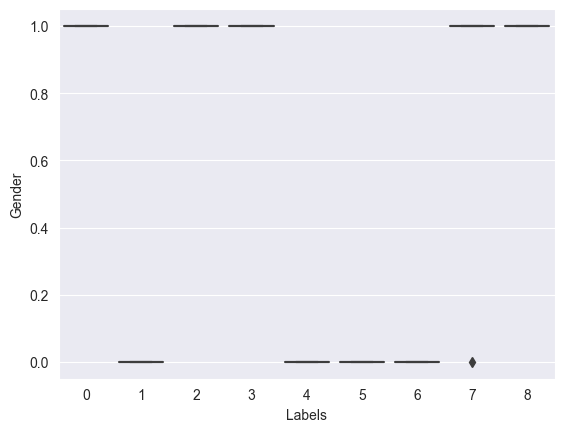

Age


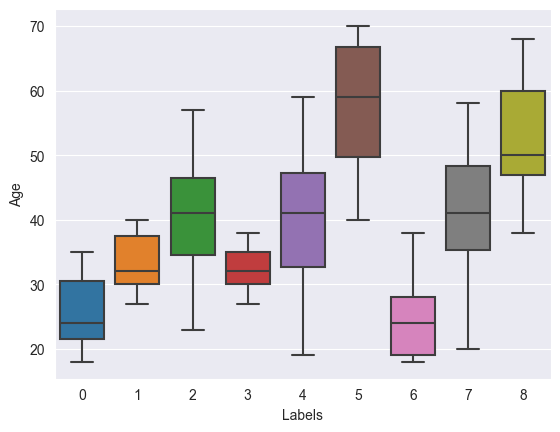

Annual Income (k$)


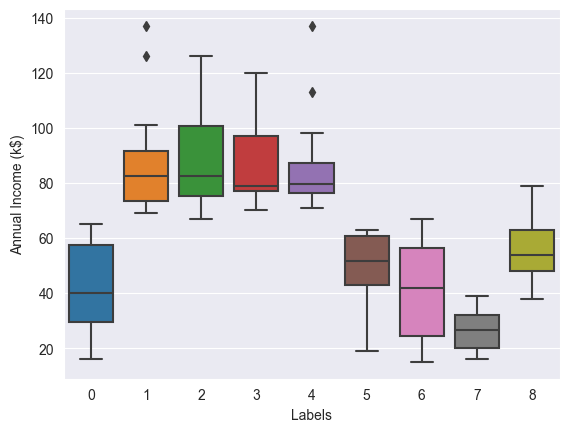

Spending Score (1-100)


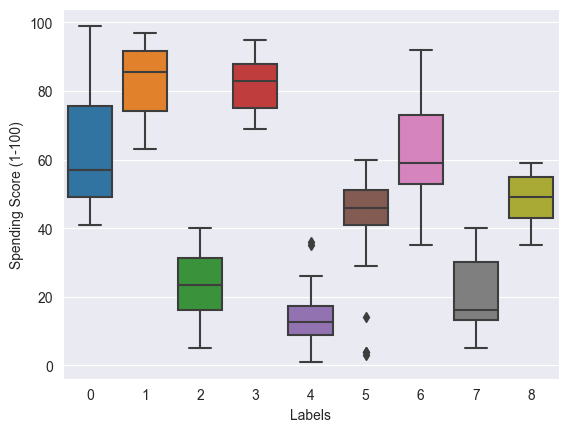

Labels


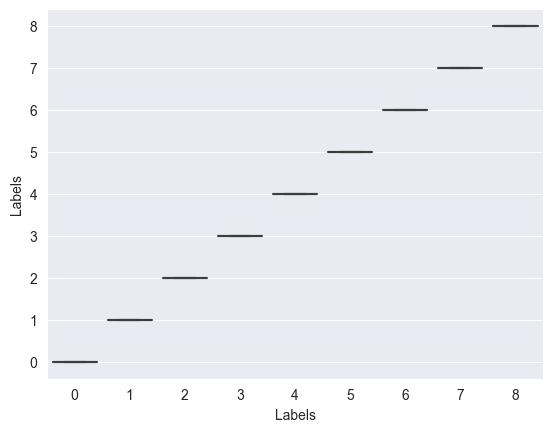

In [29]:
for col in data.columns:
    print(col)
    sns.boxplot(data=data, x=data['Labels'], y=col)
    plt.show()